## The major premise of this notebook is to find a comprehensive model, treating the data as real-world. We have treated -1 values which signified null values for each feature accordingly.
### We came to this conclusion based on the fact that all the features in the dataset are positive values like Quantity, Length etc..

In [2]:
# Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import RFECV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    roc_auc_score, confusion_matrix, classification_report, plot_roc_curve

import pickle
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_columns", None)

### Loading features dataset


In [4]:
from google.colab import files
uploaded = files.upload()

Saving dataset_small.csv to dataset_small.csv


In [4]:
data = pd.read_csv("dataset_small.csv")

# Data Preprocessing


In [5]:
data.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.0,58645.0,58645.0,58645.000000,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,2.284338,0.457123,0.171285,1.937522,0.014102,0.311177,0.033456,0.212959,0.004451,0.001535,0.004877,0.003274,0.004212,0.006855,0.000767,0.002865,0.162503,1.068429,44.959297,1.799540,0.133294,0.000290,0.0,0.0,0.0,0.000017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.440992,18.073016,0.003427,0.003530,0.022338,-0.033814,-0.210947,1.590383,-0.298525,-0.287049,-0.293409,-0.291704,-0.296070,-0.297331,-0.293733,-0.297451,-0.296905,-0.292932,-0.298525,-0.296547,-0.219200,16.923932,-0.045750,-0.211084,-0.260466,-0.298525,-0.298525,-0.296035,-0.298082,-0.296377,-0.296956,-0.297877,-0.298082,-0.297672,-0.297366,-0.296752,-0.298525,-0.298525,-0.242305,4.659067,-0.714451,-0.816506,-0.791781,-0.83

### Checking null values for testing dataset

#####  We can clearly infer that there are no null values in the data frame.

In [6]:
data.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

#### Visualising the Target Feature Phishing

Text(0.5, 1.0, 'Frequency of Both labels ')

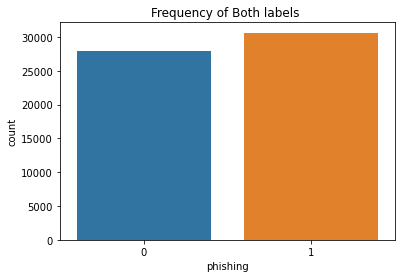

In [7]:
sns.countplot(data.phishing)
plt.title('Frequency of Both labels ')

### Checking for uniques values for each column
- we found that there are 13 such columns which have only one value through out the column.So, we try to drop those columns from the data frame.
- Here we use Variance threshold as a Feature selector that removes all low-variance features.

In [8]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(data)
var_thres.get_support()
constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]]
print(f"No of columns with 0 variance: {len(constant_columns)}")
constant_columns

No of columns with 0 variance: 13


['qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain']

#### We drop all the low variant features.

In [9]:
data = data.drop(constant_columns,axis=1)
data.shape


(58645, 99)

#### We delete duplicate rows (if any) 

In [10]:
print("No of duplicate columns: ",data.duplicated(keep='first').sum())
#dropping duplicate rows
data.drop_duplicates(inplace=True)

No of duplicate columns:  1240


In [11]:
# Data distribution of the features
cols1={} 
for i in data.columns:
    print("- - - - - - - - - - - - ")
    x=data[i].value_counts(normalize=True)
    print(x)
    if data[i].isin([-1]).any():
        cols1[i]=x[-1] 

- - - - - - - - - - - - 
2     0.502326
1     0.220225
3     0.178347
4     0.059385
5     0.017350
6     0.007856
7     0.003745
14    0.002334
8     0.001812
15    0.001498
9     0.001097
10    0.000836
16    0.000766
13    0.000645
12    0.000575
11    0.000557
17    0.000383
18    0.000105
22    0.000052
20    0.000052
24    0.000017
23    0.000017
19    0.000017
Name: qty_dot_url, dtype: float64
- - - - - - - - - - - - 
0     0.766484
1     0.151955
2     0.037662
3     0.015034
4     0.008745
5     0.006080
6     0.003745
7     0.002700
8     0.001916
9     0.001307
10    0.001272
11    0.000923
12    0.000645
13    0.000436
14    0.000226
15    0.000174
17    0.000139
16    0.000087
21    0.000087
18    0.000070
19    0.000052
20    0.000052
31    0.000035
26    0.000035
23    0.000035
25    0.000035
24    0.000017
27    0.000017
35    0.000017
34    0.000017
Name: qty_hyphen_url, dtype: float64
- - - - - - - - - - - - 
0     0.908196
1     0.056842
2     0.017995
3     0.008187

#### Checking which columns consists of value -1
##### Later -1 can be replaced with NAN and use KNN imputer or MissForest imputer to predict the missing value

In [12]:
data.columns[data.isin([-1]).any()]

Index(['qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory',
       'qty_slash_directory', 'qty_questionmark_directory',
       'qty_equal_directory', 'qty_at_directory', 'qty_and_directory',
       'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory', 'qty_hashtag_directory',
       'qty_dollar_directory', 'qty_percent_directory', 'directory_length',
       'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file',
       'qty_slash_file', 'qty_questionmark_file', 'qty_equal_file',
       'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file', 'qty_hashtag_file', 'qty_dollar_file',
       'qty_percent_file', 'file_length', 'qty_dot_params',
       'qty_hyphen_params', 'qty_underline_params', 'qty_slash_params',
       'qty_questionmark_params', 'qty_equal_params

## In the cell below, we are checking the percentage of '-1' values present in each and every feature.

In [13]:
# % of data in each column as '-1'
cols1

{'qty_dot_directory': 0.2877623900357112,
 'qty_hyphen_directory': 0.2877623900357112,
 'qty_underline_directory': 0.2877623900357112,
 'qty_slash_directory': 0.2877623900357112,
 'qty_questionmark_directory': 0.2877623900357112,
 'qty_equal_directory': 0.2877623900357112,
 'qty_at_directory': 0.2877623900357112,
 'qty_and_directory': 0.2877623900357112,
 'qty_exclamation_directory': 0.2877623900357112,
 'qty_space_directory': 0.2877623900357112,
 'qty_tilde_directory': 0.2877623900357112,
 'qty_comma_directory': 0.2877623900357112,
 'qty_plus_directory': 0.2877623900357112,
 'qty_asterisk_directory': 0.2877623900357112,
 'qty_hashtag_directory': 0.2877623900357112,
 'qty_dollar_directory': 0.2877623900357112,
 'qty_percent_directory': 0.2877623900357112,
 'directory_length': 0.2877623900357112,
 'qty_dot_file': 0.2877623900357112,
 'qty_hyphen_file': 0.2877623900357112,
 'qty_underline_file': 0.2877623900357112,
 'qty_slash_file': 0.2877623900357112,
 'qty_questionmark_file': 0.287762

In [14]:
# we can clearly infer that there are a lot of missing values in the params group.
# Here we drop the features that have maximum number of instances as Null (threshold=80%).
for i,j in cols1.items():
    if j>=0.8:
        data.drop(i,inplace=True,axis=1)

df_imp=data.replace(to_replace = -1,value =np.nan)

### Here we try to visualize the missing data in the dataframe using missing number library to plot missing values.

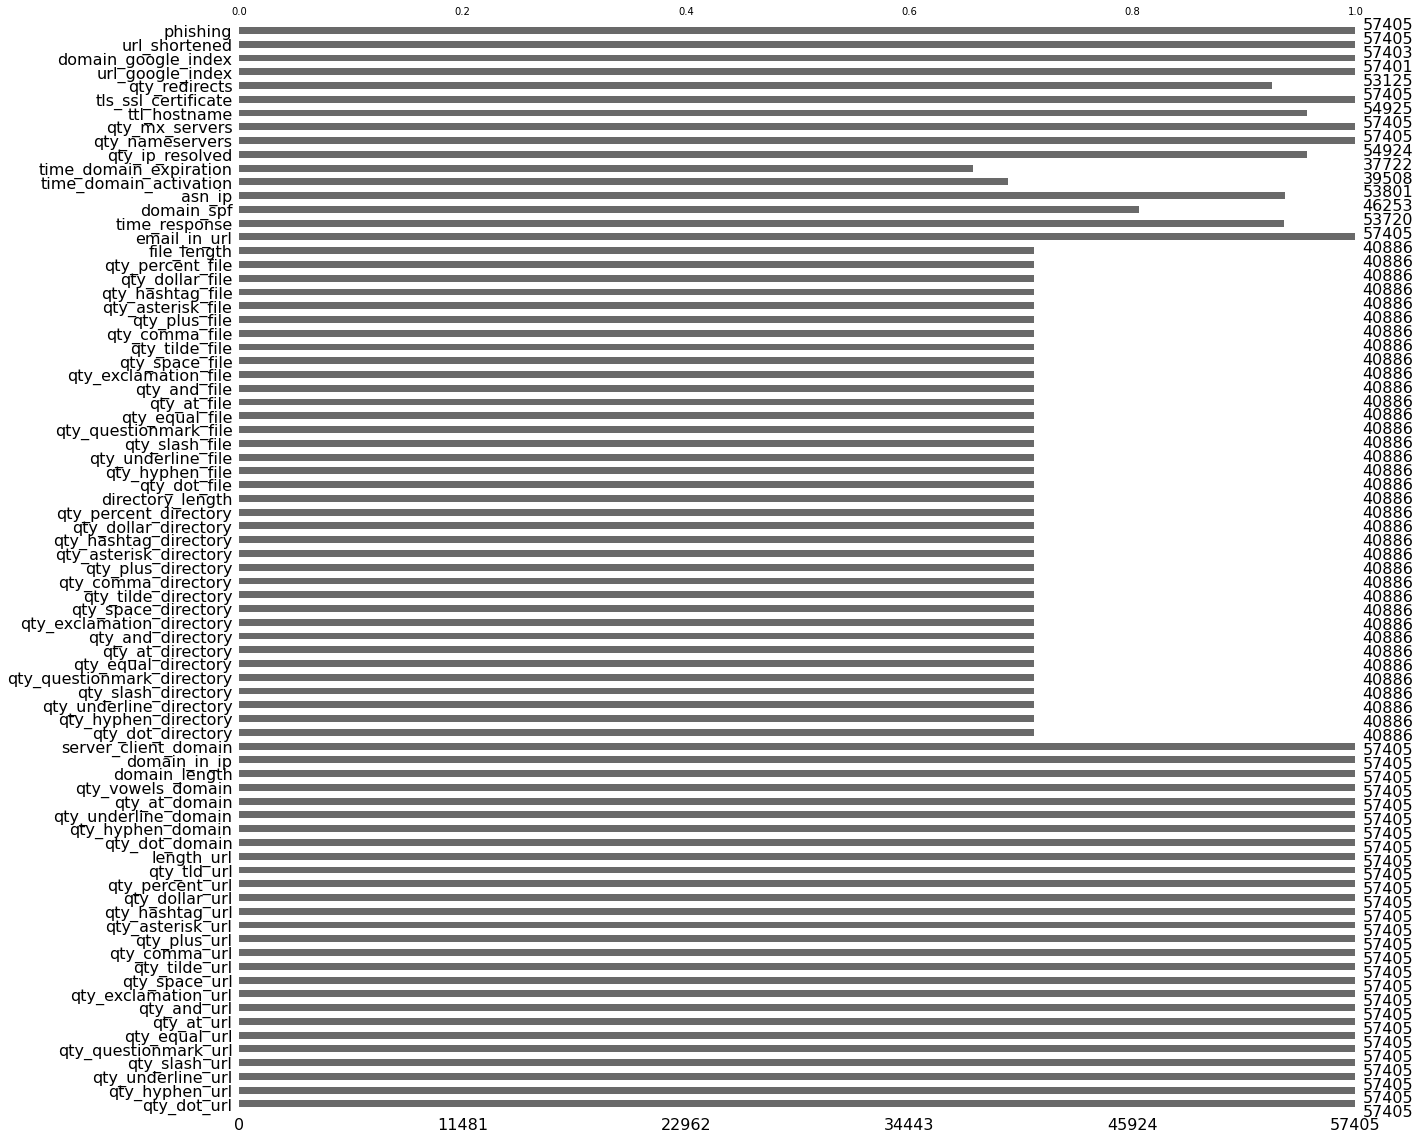

In [17]:
msno.bar(df_imp,figsize = (20,20))

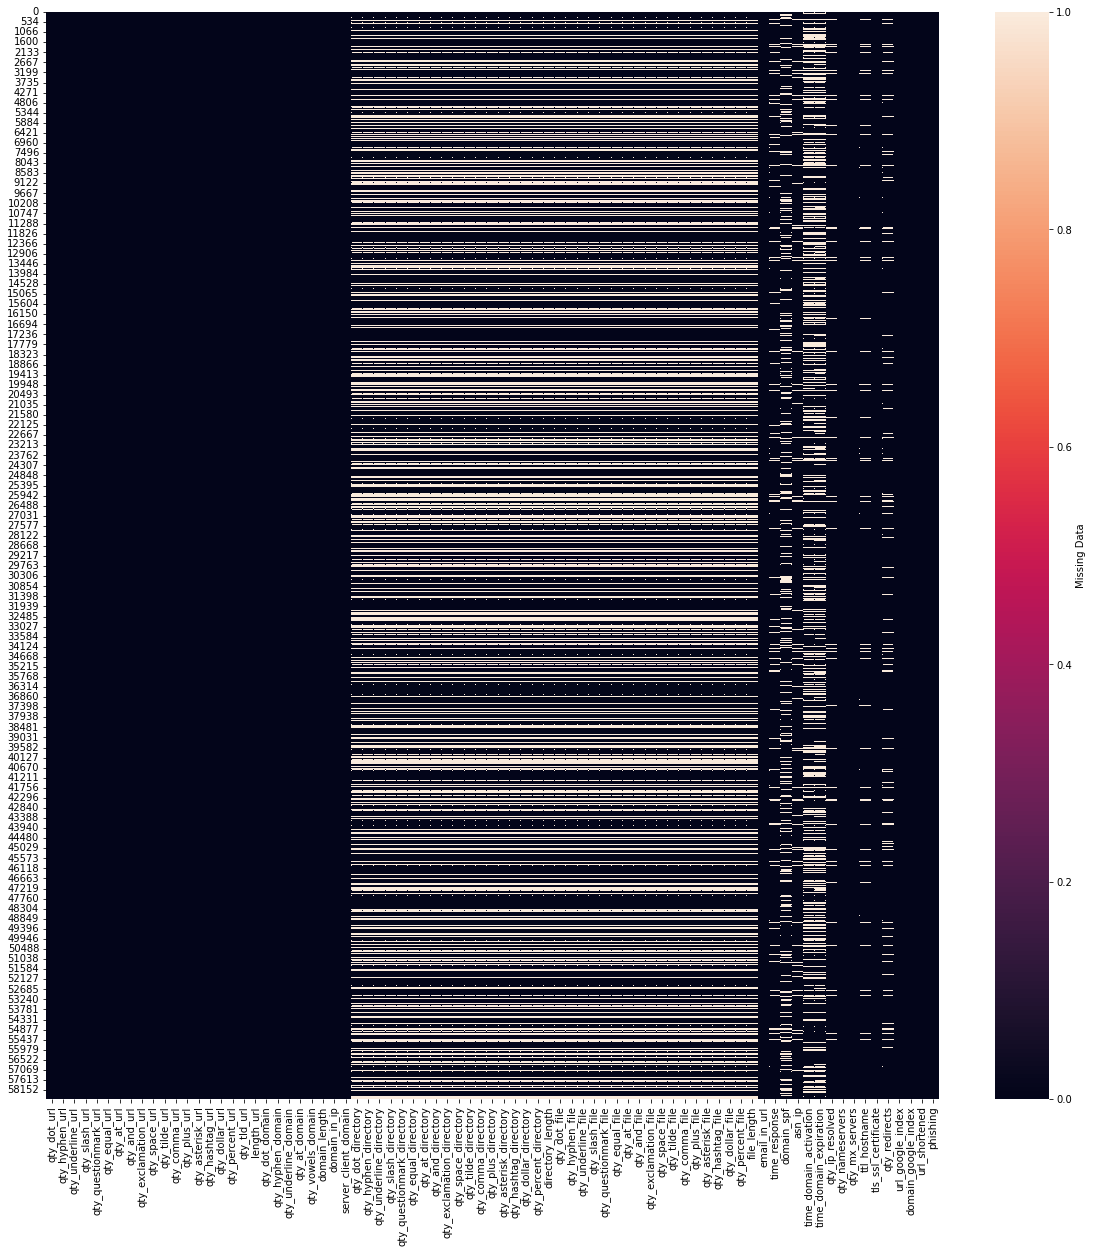

In [18]:
#missing values before imputation
plt.figure(figsize=(20,20))
sns.heatmap(df_imp.isna(),cbar_kws={'label':'Missing Data'})

## Feature Engineering
- We will impute the missing data with mutliple imputation techniques like Mean Imputation,KNN Imputer.

### Mean Imputation

In [19]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(df_imp)
mean_imputed_df = imp_mean.transform(df_imp)
mean_imputed_df = pd.DataFrame(mean_imputed_df,columns = df_imp.columns)
mean_imputed_df.shape

(57405, 79)

### Most Frequent Imputation

In [20]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(df_imp)
mostFreq_imputed_df = imp_mean.transform(df_imp)
mostFreq_imputed_df = pd.DataFrame(mostFreq_imputed_df,columns = df_imp.columns)
mostFreq_imputed_df.shape

(57405, 79)

### KNN Imputation

In [16]:
import sklearn.neighbors._base
import sys

sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

#usind KNN imputer
from sklearn.impute import KNNImputer
r=KNNImputer(n_neighbors=3)
knn_imputed_df=r.fit_transform(df_imp)
knn_imputed_df=pd.DataFrame(knn_imputed_df,columns=df_imp.columns)

In [17]:
knn_imputed_df.shape

(57405, 79)

In [18]:
# Below we try to check if the values in the dataframe are unique through out the column.
# If any of them exists we try to remove them.
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(knn_imputed_df)
var_thres.get_support()
constant_columns = [column for column in knn_imputed_df.columns
                    if column not in knn_imputed_df.columns[var_thres.get_support()]]
print(f"No of columns with 0 variance: {len(constant_columns)}")
print(constant_columns)

knn_imputed_df = knn_imputed_df.drop(constant_columns,axis=1)
knn_imputed_df.shape

No of columns with 0 variance: 6
['qty_questionmark_directory', 'qty_hashtag_directory', 'qty_slash_file', 'qty_questionmark_file', 'qty_hashtag_file', 'qty_dollar_file']


(57405, 73)

In [19]:
# domain_spf feature values should have range:[0,1] but due to imputation, it got values such as  0.333,0.6666, as it takes an average of nearest neighbors values. 
# These values are rounded off to the nearest data instance.
print(knn_imputed_df.domain_spf.value_counts())
knn_imputed_df.domain_spf=knn_imputed_df.domain_spf.apply(lambda x:np.round(x))
print(knn_imputed_df.domain_spf.value_counts())

0.000000    47638
1.000000     9419
0.333333      307
0.666667       41
Name: domain_spf, dtype: int64
0.0    47945
1.0     9460
Name: domain_spf, dtype: int64


#### Segregating the numerical columns and categorial columns inorder to do better analysis

In [20]:
numerical_cols=[]
categorical_cols=[]
for i in knn_imputed_df.columns:
    if knn_imputed_df[i].nunique()<=2:
        categorical_cols.append(i)
    else:
        numerical_cols.append(i)
        

categorical_cols.remove('qty_at_domain')
numerical_cols.append('qty_at_domain')

print("Numerical Columns: \n",numerical_cols) 
print("###############################")
print("categorical_cols: \n",categorical_cols)

Numerical Columns: 
 ['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_vowels_domain', 'domain_length', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory', 'qty_asterisk_directory', 'qty_dollar_directory', 'qty_percent_directory', 'directory_length', 'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file', 'qty_equal_file', 'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file', 'qty_tilde_file', '

In [ ]:
#knn_imputed_df.to_csv("knn_imputed_dataset.csv",index=False)

In [26]:
url_cols=['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url','qty_questionmark_url', 
          'qty_equal_url', 'qty_at_url', 'qty_and_url','qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
          'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url',
       'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url','email_in_url','phishing']

domain_cols=['qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain',
        'qty_vowels_domain', 'domain_length', 'domain_in_ip','server_client_domain','phishing']

dir_cols=['qty_dot_directory', 'qty_hyphen_directory',
       'qty_underline_directory', 'qty_slash_directory', 'qty_equal_directory', 'qty_at_directory',
       'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory','qty_dollar_directory', 'qty_percent_directory', 'directory_length','phishing']

file_cols=['qty_dot_file', 'qty_hyphen_file', 'qty_underline_file','qty_equal_file',
       'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file','qty_percent_file', 'file_length','phishing']

external_cols=[ 'time_response','domain_spf', 'asn_ip', 'time_domain_activation',
       'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers',
       'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate',
       'qty_redirects', 'url_google_index', 'domain_google_index',
       'url_shortened','phishing']

#### We try to count the number of observations per category for categorical features
- We can observe from below plot that the columns are relatively balanced for two features: tls_ssl_certificate_variable and target feature phishing

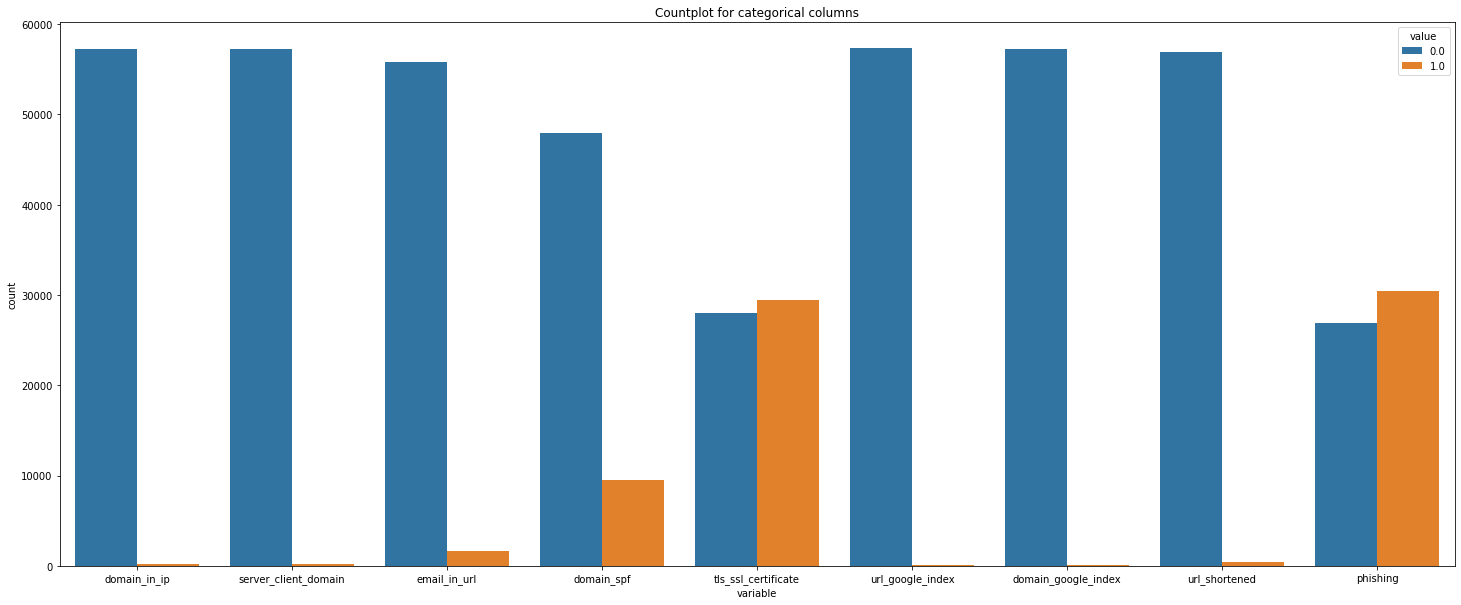

In [27]:
#countplot for categorical values
plt.figure(figsize=(25,10))
df_categorical = knn_imputed_df.loc[:,categorical_cols]
sns.countplot(x='variable',hue='value',data= pd.melt(df_categorical))
plt.title('Countplot for categorical columns')
plt.show()

## From here we analyse the data in two parts 
#### i) First we do analysis on Mean Imputed data
#### ii)Later on KNN Imputed Data  

## I) Analysis on Mean Imputed data

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score

X = mean_imputed_df.drop( columns='phishing')
Y = mean_imputed_df['phishing']


##### Spliting the data into training and test sets 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

### XGBoost Model training for feature importance on Mean imputed data

In [30]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb = XGBClassifier(subsample = 0.1, n_estimators = 500, min_child_weight = 1,  max_depth = 5,  eta = 0.05, colsample_bytree = 0.1)
xgb.fit(X, Y)

#### XGBoost Hyperparameter Tuning 

In [31]:
from sklearn.model_selection import RandomizedSearchCV
print("Tuning")

params = {
    # Parameters that we are going to tune.
    'max_depth':[int(x) for x in np.linspace(start=5, stop=20, num=1)],
    'min_child_weight':[int(x) for x in np.linspace(start=1, stop=10, num=1)],
    'eta':[0.3, 0.2, 0.1, 0.05, 0.01, 0.005],
    'subsample': [x/10 for x in np.linspace(start=1, stop=10, num=1)],
    'colsample_bytree': [x/10 for x in np.linspace(start=1, stop=10, num=1)],
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=500, num=50)]
}

xgb_random_search = RandomizedSearchCV(estimator=xgb,
                                      param_distributions = params,
                                      n_iter = 100,
                                      cv=3,
                                      verbose=2,
                                      random_state=47,
                                      n_jobs=2)

xgb_random_search.fit(X_train, y_train)
print(xgb_random_search.best_params_)

Tuning
Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'subsample': 0.1, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 5, 'eta': 0.05, 'colsample_bytree': 0.1}


In [32]:
xgb = XGBClassifier(subsample = 0.1, n_estimators = 500, min_child_weight = 1,  max_depth = 5,  eta = 0.05, colsample_bytree = 0.1)
xgb.fit(X, Y)

XGBClassifier(colsample_bytree=0.1, eta=0.05, max_depth=5, n_estimators=500,
              subsample=0.1)

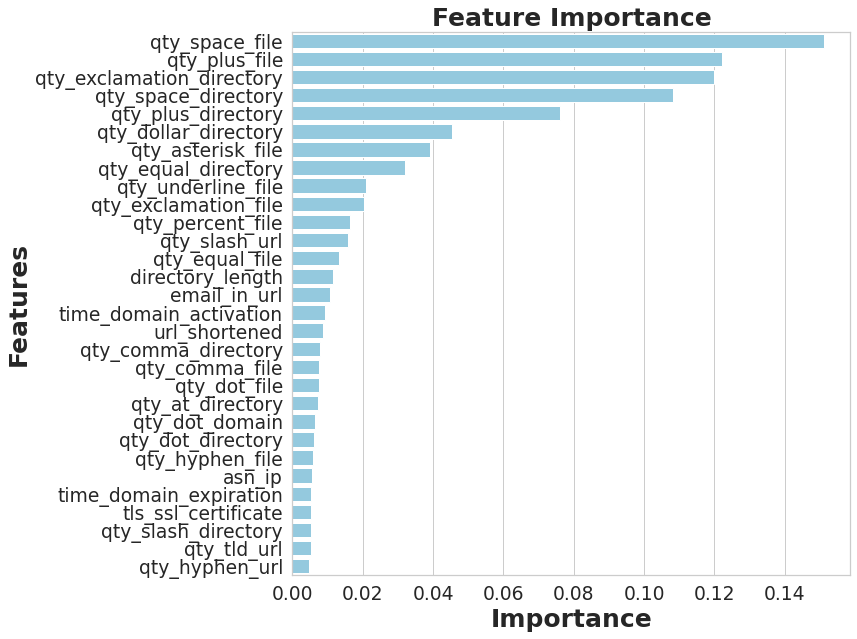

None

In [33]:
import seaborn as sns
feats = {}
for feature, importance in zip(X.columns, xgb.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances = importances.sort_values(by='Importance', ascending=False).nlargest(30, 'Importance')
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.barplot(x=importances['Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())

In [34]:
display(importances)

,Features,Importance
0,qty_space_file,0.151159
1,qty_plus_file,0.122230
2,qty_exclamation_directory,0.119825
3,qty_space_directory,0.108118
4,qty_plus_directory,0.076222
5,qty_dollar_directory,0.045365
6,qty_asterisk_file,0.039150
7,qty_equal_directory,0.032082
8,qty_underline_file,0.020782
9,qty_exclamation_file,0.020370


#### From the above graph we can clearly say that the first 15 features have a high importance and then the importance became constant.So, we filter out the important features and then continue the analysis

In [35]:
imp_features_df = X[['qty_space_file','qty_plus_file','qty_exclamation_directory','qty_space_directory','qty_plus_directory',
                     'qty_dollar_directory','qty_asterisk_file','qty_equal_directory','qty_underline_file',
                     'qty_exclamation_file','qty_percent_file','qty_slash_url','time_domain_activation','email_in_url'
                     ,'directory_length',]]

In [36]:
imp_features_df.head()

,qty_space_file,qty_plus_file,qty_exclamation_directory,qty_space_directory,qty_plus_directory,qty_dollar_directory,qty_asterisk_file,qty_equal_directory,qty_underline_file,qty_exclamation_file,qty_percent_file,qty_slash_url,time_domain_activation,email_in_url,directory_length
0,0.000929,0.001663,0.003522,0.001712,0.002324,0.002837,0.002544,0.015286,0.054297,0.00225,0.080639,0.0,4927.000000,0.0,24.48261
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.0,8217.000000,0.0,6.00000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,258.000000,0.0,1.00000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.0,2602.000000,0.0,13.00000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,4.0,3732.887618,0.0,27.00000


In [37]:
frames = [imp_features_df, Y]
ref_df = pd.concat(frames,axis = 1)

### Plotting the Box plot and violin plot to check the outliers

#### We can clearly infer that ouliers exists.So, we try to remove in the later steps

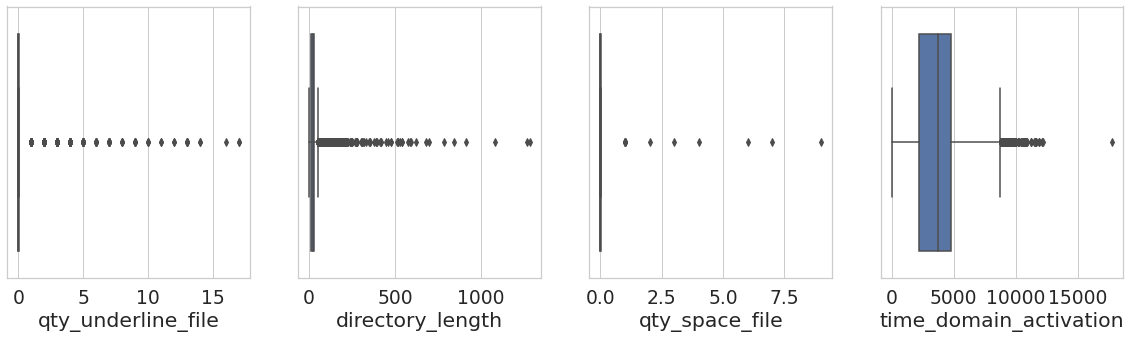

In [38]:
import seaborn as sns
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True)
fig.set_size_inches(20,5)
sns.boxplot(x=imp_features_df['qty_underline_file'],ax=ax1)
sns.boxplot(x=imp_features_df['directory_length'],ax=ax2)
sns.boxplot(x=imp_features_df['qty_space_file'],ax=ax3)
sns.boxplot(x=imp_features_df['time_domain_activation'],ax=ax4)

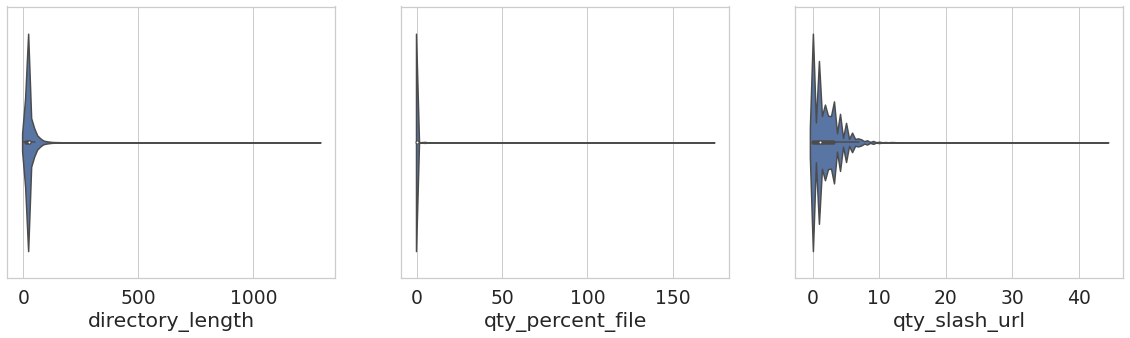

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
fig.set_size_inches(20,5)
sns.violinplot(x=imp_features_df['directory_length'],ax=ax1)
sns.violinplot(x=imp_features_df['qty_percent_file'],ax=ax2)
sns.violinplot(x=imp_features_df['qty_slash_url'],ax=ax3)

In [40]:
for i in ref_df.columns:
  print(i)

qty_space_file
qty_plus_file
qty_exclamation_directory
qty_space_directory
qty_plus_directory
qty_dollar_directory
qty_asterisk_file
qty_equal_directory
qty_underline_file
qty_exclamation_file
qty_percent_file
qty_slash_url
time_domain_activation
email_in_url
directory_length
phishing


In [41]:
# We are using the Inter Quartile range to remove all the outliers for important features 
X_temp = imp_features_df.drop({'time_domain_activation','email_in_url'},axis=1)
imp_temp = imp_features_df[{'time_domain_activation','email_in_url'}]
for i in X_temp.columns:

  a = X_temp[i]
  Q1=a.quantile(0.25)
  Q3=a.quantile(0.75)
  IQR=Q3-Q1
  lowqe_bound=Q1 - 1.5 * IQR
  upper_bound=Q3 + 1.5 * IQR
  print(lowqe_bound,upper_bound)
  percentile25 = X_temp[i].quantile(0.25)
  percentile75 = X_temp[i].quantile(0.75)
  iqr = percentile75-percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr

  X_temp[X_temp[i] > upper_limit]
  X_temp[X_temp[i] < lower_limit]

  X_temp = X_temp[X_temp[i] < upper_limit]

-0.0013941202367558578 0.0023235337279264297
-0.002494741476299956 0.004157902460499926
-0.005282981949811671 0.008804969916352785
-0.002568116225602896 0.004280193709338159
-0.0034853005918896443 0.0058088343198160735
-0.004255735459570514 0.0070928924326175225
-0.0038154869637528743 0.006359144939588123
-0.022929609157168712 0.03821601526194786
-0.08144597172626326 0.13574328621043877
-0.003375238467935235 0.005625397446558725
-0.1209582742258964 0.20159712370982735
-4.5 7.5
-14.223915276622805 47.70652546103801


In [42]:
frames = [X_temp, imp_temp]
imp_features_df = pd.concat(frames,axis = 1)

In [43]:
imp_features_df.describe()

,qty_space_file,qty_plus_file,qty_exclamation_directory,qty_space_directory,qty_plus_directory,qty_dollar_directory,qty_asterisk_file,qty_equal_directory,qty_underline_file,qty_exclamation_file,qty_percent_file,qty_slash_url,directory_length,time_domain_activation,email_in_url
count,50381.000000,50381.000000,50381.000000,50381.000000,50381.000000,50381.000000,50381.000000,50381.000000,50381.000000,50381.000000,50381.000000,50381.000000,50381.000000,57405.000000,57405.000000
mean,0.000305,0.000545,0.001155,0.000561,0.000762,0.000930,0.000834,0.005012,0.017803,0.000738,0.026440,1.554534,18.822438,3732.887618,0.028133
std,0.000436,0.000781,0.001653,0.000804,0.001091,0.001332,0.001194,0.007176,0.025490,0.001056,0.037856,1.562890,11.725088,2206.545139,0.165355
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2179.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,24.482610,3732.887618,0.000000
75%,0.000929,0.001663,0.003522,0.001712,0.002324,0.002837,0.002544,0.015286,0.054297,0.002250,0.080639,3.000000,24.482610,4817.000000,0.000000
max,0.000929,0.001663,0.003522,0.001712,0.002324,0.002837,0.002544,0.015286,0.054297,0.002250,0.080639,7.000000,47.000000,17775.000000,1.000000


#### Below we can clearly see that the outliers has been removed

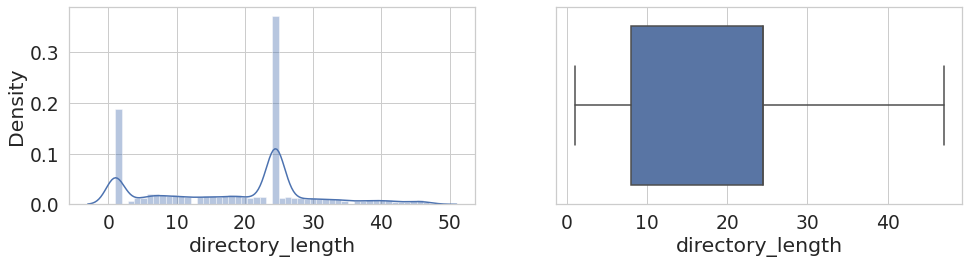

In [44]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(imp_features_df['directory_length'])
plt.subplot(2,2,2)
sns.boxplot(imp_features_df['directory_length'])
plt.show()

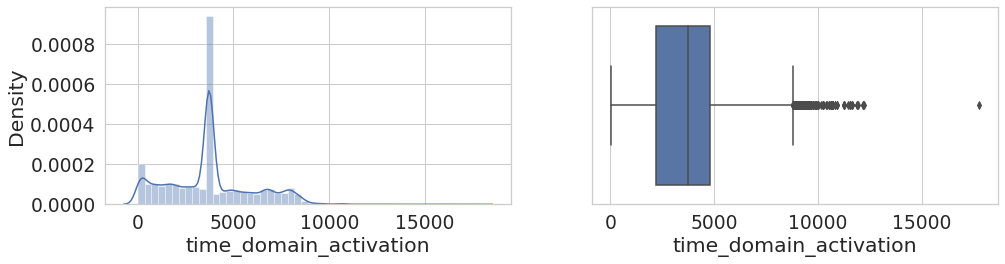

In [45]:

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(ref_df['time_domain_activation'])
plt.subplot(2,2,2)
sns.boxplot(ref_df['time_domain_activation'])
plt.show()

### Now we will find the correlation between all the features and the target feature.

In [46]:
ref_df.corr()

,qty_space_file,qty_plus_file,qty_exclamation_directory,qty_space_directory,qty_plus_directory,qty_dollar_directory,qty_asterisk_file,qty_equal_directory,qty_underline_file,qty_exclamation_file,qty_percent_file,qty_slash_url,time_domain_activation,email_in_url,directory_length,phishing
qty_space_file,1.000000,-0.000187,-0.000527,0.717790,-0.000235,-0.000278,-0.000105,-0.001317,-0.001633,-0.000585,-0.000543,0.001042,-0.003421,-0.002664,0.012814,0.006091
qty_plus_file,-0.000187,1.000000,-0.000563,-0.000247,0.953898,-0.000297,-0.000112,0.009427,-0.001273,-0.000625,0.001324,0.006767,0.003720,-0.002848,0.028326,-0.008607
qty_exclamation_directory,-0.000527,-0.000563,1.000000,-0.000697,0.069133,0.267913,0.025558,-0.002165,0.014584,0.585679,0.005404,-0.008839,-0.015434,-0.005203,0.034748,0.018352
qty_space_directory,0.717790,-0.000247,-0.000697,1.000000,-0.000311,-0.000368,-0.000139,-0.001741,-0.002159,-0.000774,-0.000717,0.004867,-0.005144,-0.003523,0.015396,0.008055
qty_plus_directory,-0.000235,0.953898,0.069133,-0.000311,1.000000,0.050953,-0.000141,0.017730,-0.000918,-0.000786,0.000984,0.007373,0.003732,-0.001671,0.035176,-0.008899
qty_dollar_directory,-0.000278,-0.000297,0.267913,-0.000368,0.050953,1.000000,-0.000167,-0.002095,-0.002597,-0.000931,-0.000863,-0.001116,-0.006279,0.000390,0.098849,0.009690
qty_asterisk_file,-0.000105,-0.000112,0.025558,-0.000139,-0.000141,-0.000167,1.000000,-0.000293,0.003875,0.044614,0.429936,-0.005082,-0.002681,-0.001598,0.094005,0.003652
qty_equal_directory,-0.001317,0.009427,-0.002165,-0.001741,0.017730,-0.002095,-0.000293,1.000000,0.010530,-0.001273,-0.002302,0.096890,-0.026084,0.011651,0.167417,0.045061
qty_underline_file,-0.001633,-0.001273,0.014584,-0.002159,-0.000918,-0.002597,0.003875,0.010530,1.000000,0.028432,0.095471,-0.001779,0.031372,-0.020902,0.233166,-0.027685
qty_exclamation_file,-0.000585,-0.000625,0.585679,-0.000774,-0.000786,-0.000931,0.044614,-0.001273,0.028432,1.000000,0.010417,-0.010500,-0.011563,-0.008912,0.012811,0.020376


#### Time Domain Activation has negative correlation with Phishing feature
#### Qty Slash Url relatively has a positive correlation with Phishing feature

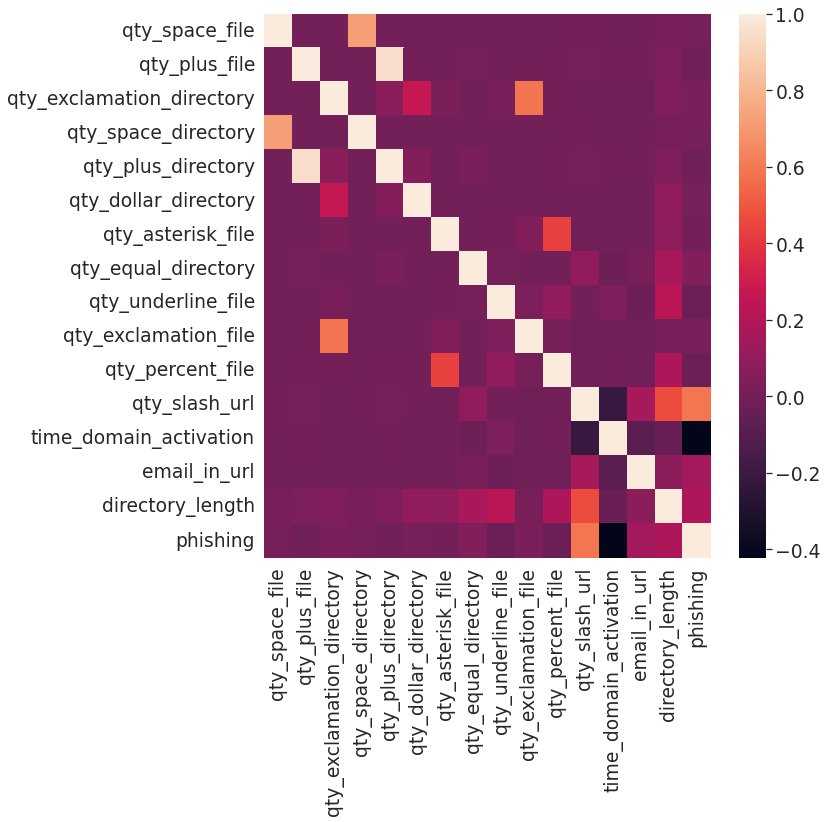

In [47]:
fig = plt.figure(figsize=(8, 6))
fig.set_size_inches(10,10)
sns.heatmap(ref_df.corr())

#### We can clearly infer that if the Domain Activation time is between 3000 to 4000 days, there is high probability of the website being a phishing website. 

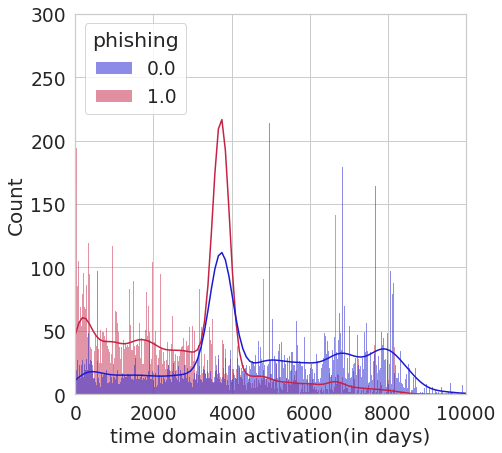

In [48]:
colors = ["#1B1AD0","#C52244"]
plt.figure(figsize=(7,7))
sns.histplot(data=ref_df, x="time_domain_activation", hue = "phishing",binwidth=10, kde=True, palette=sns.color_palette(colors))
plt.ylim(0,300)
plt.xlim(0, 10000)
plt.xlabel('time domain activation(in days)', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

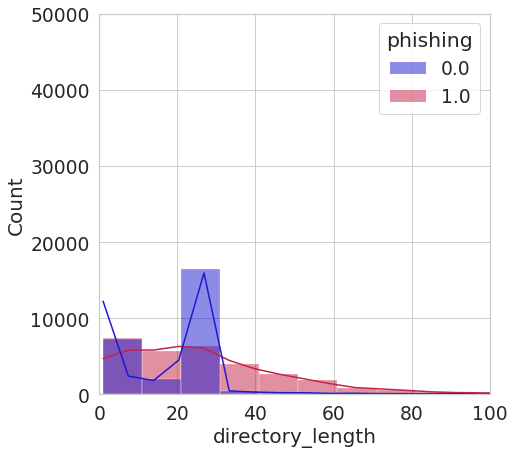

In [49]:
colors = ["#1B1AD0","#C52244"]
plt.figure(figsize=(7,7))
sns.histplot(data=ref_df, x="directory_length", hue = "phishing",binwidth=10, kde=True, palette=sns.color_palette(colors))
plt.ylim(0,50000)
plt.xlim(0, 100)
plt.xlabel('directory_length', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

### Feature selection & Model Training 

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
X_mean_imputed = ref_df
Y_mean_imputed = ref_df['phishing']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_mean_imputed, Y_mean_imputed, test_size=0.3, random_state=0)

In [72]:
from sklearn import metrics
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train1,y_train1)
    yhat= knn.predict(X_test1)
    mean_acc[i-1] = metrics.accuracy_score(y_test1, yhat)

mean_acc

array([0.94779933, 0.92631518, 0.93217977, 0.92097317, 0.92161189,
       0.91133434, 0.90848914, 0.90198583, 0.90047614, 0.89681802,
       0.89490187, 0.88985019, 0.88944373, 0.88561143, 0.88375334,
       0.88050168, 0.87905005, 0.87527581, 0.8741145 , 0.87039833])

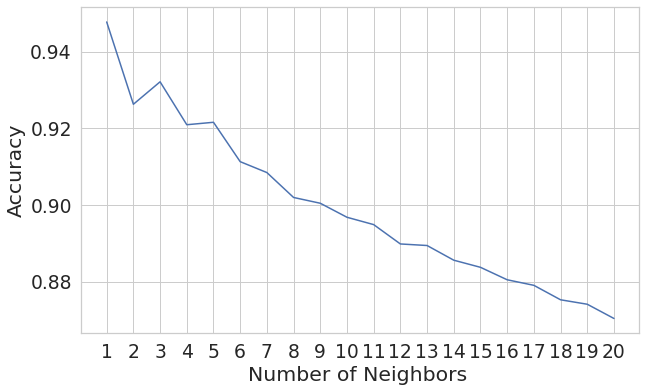

In [73]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

#### As the number of neighbors increases, the accuracy decreases.

In [51]:
# Training the KNN Classifier model with mean_imputed data
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn.fit(X_train1, y_train1)

KNeighborsClassifier(algorithm='brute', metric='manhattan', weights='distance')

In [55]:
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [1,3,5,7,9],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [74]:
# fit the model on our train set
g_res = gs.fit(X_train1, y_train1)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [75]:
# find the best score
g_res.best_score_

0.9462210473513858

In [76]:
# get the hyperparameters with the best score
g_res.best_params_


{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [77]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', weights='distance')

In [78]:
## We calculate the accuracy
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.9999502277082348
Test set accuracy:  0.877772616420857


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      8074
         1.0       0.88      0.90      0.89      9148

    accuracy                           0.88     17222
   macro avg       0.88      0.88      0.88     17222
weighted avg       0.88      0.88      0.88     17222



In [81]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_mean_imputed, Y_mean_imputed, cv =5)

#### The Accuracy of Knn classifier for Mean Imputed data after Hyper parameter tuning 

In [82]:
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.9575820921522515


#### The Logistic regression model clearly overfits

In [89]:
# Grid search cross validation
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train1,y_train1)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.9999751119960179


In [91]:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train1,y_train1)
print("score",logreg2.score(X_test1,y_test1))

score 0.9997096736732087


## II) Analysis on KNN Imputed data

In [3]:
df_knn=pd.read_csv("knn_imputed_dataset.csv")

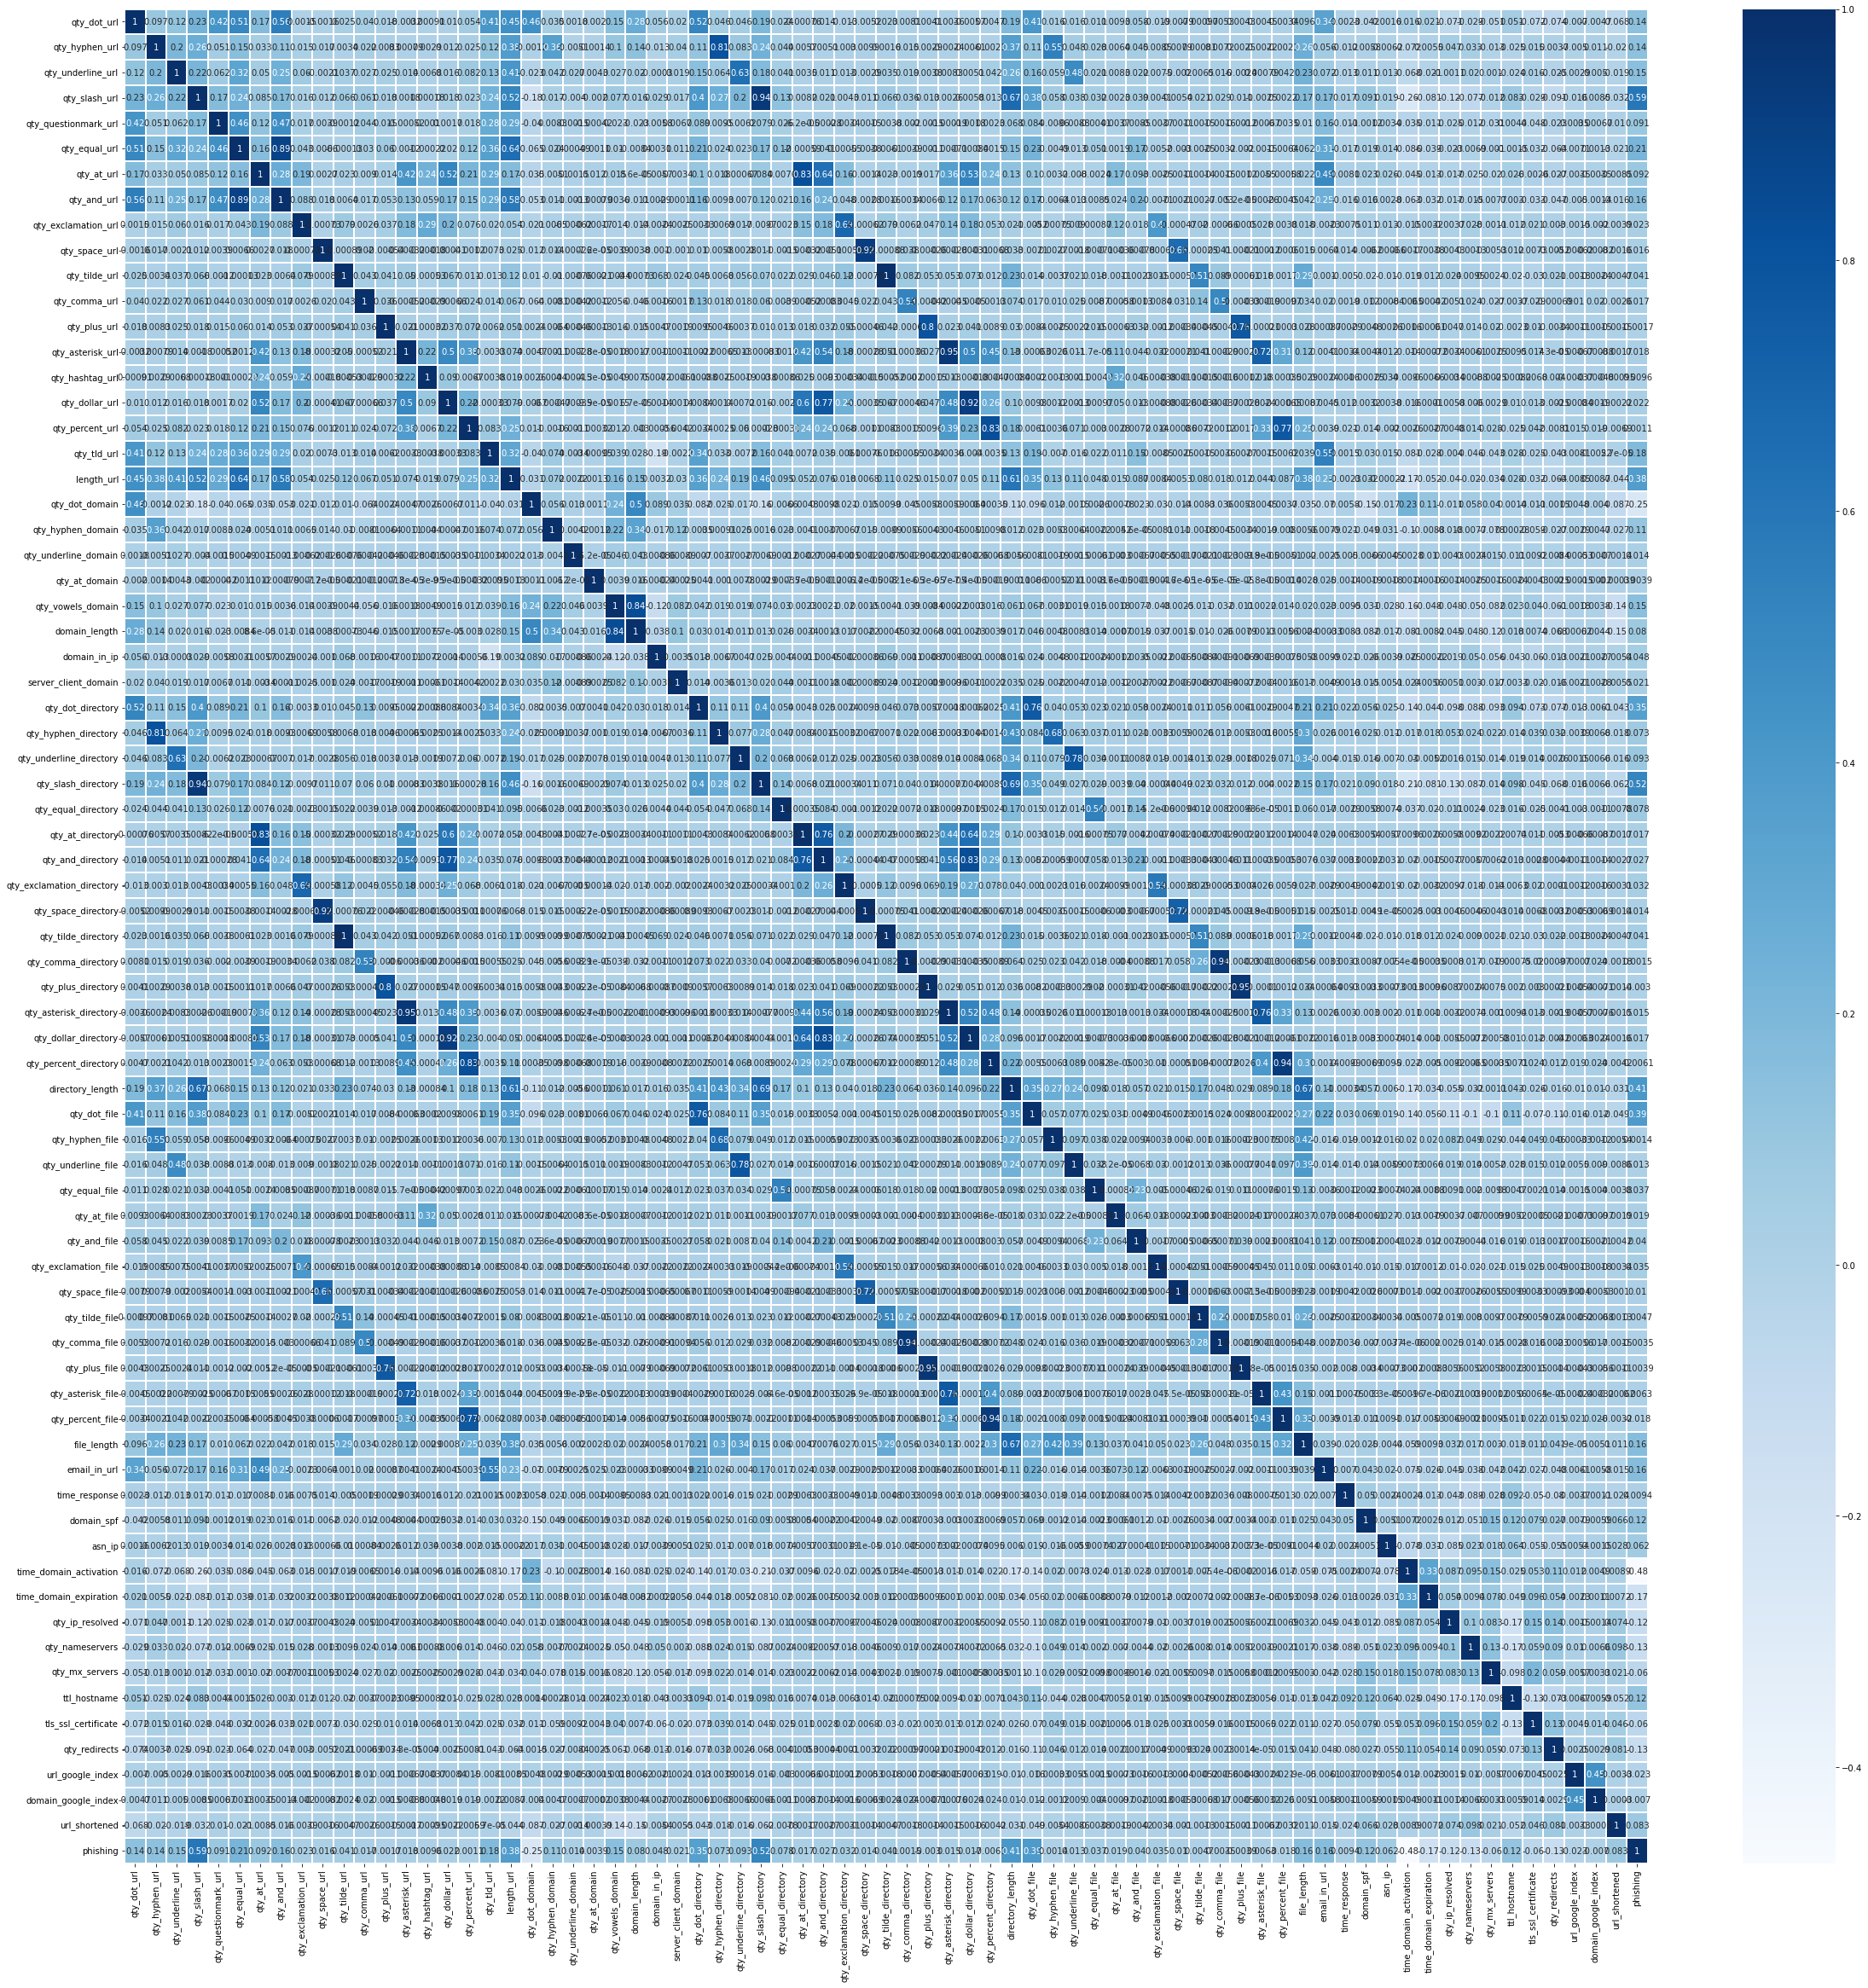

In [22]:
# Heatmap for knn impurted dataset
plt.figure(figsize=(40,40))
sns.heatmap(df_knn.corr(),annot=True,linewidths="0.3",cmap="Blues")
plt.show()

In [23]:
# We don’t want highly correlated features in your dataset because they provide the same information 

correlated_features = set()
correlation_matrix = df_knn.drop('phishing', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print("most correlated features are :",correlated_features)

most correlated features are : {'qty_plus_file', 'qty_dollar_directory', 'qty_percent_directory', 'domain_length', 'qty_at_directory', 'qty_percent_file', 'qty_plus_directory', 'qty_hyphen_directory', 'qty_and_url', 'qty_asterisk_directory', 'qty_comma_file', 'qty_slash_directory', 'qty_tilde_directory', 'qty_space_directory'}


In [6]:
X = df_knn.drop('phishing', axis=1)
y = df_knn['phishing']

#### Using Backward selection wrapper method for feature selection

[00:48:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:48:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:48:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:48:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[00:49:36] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:38] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:40] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:42] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

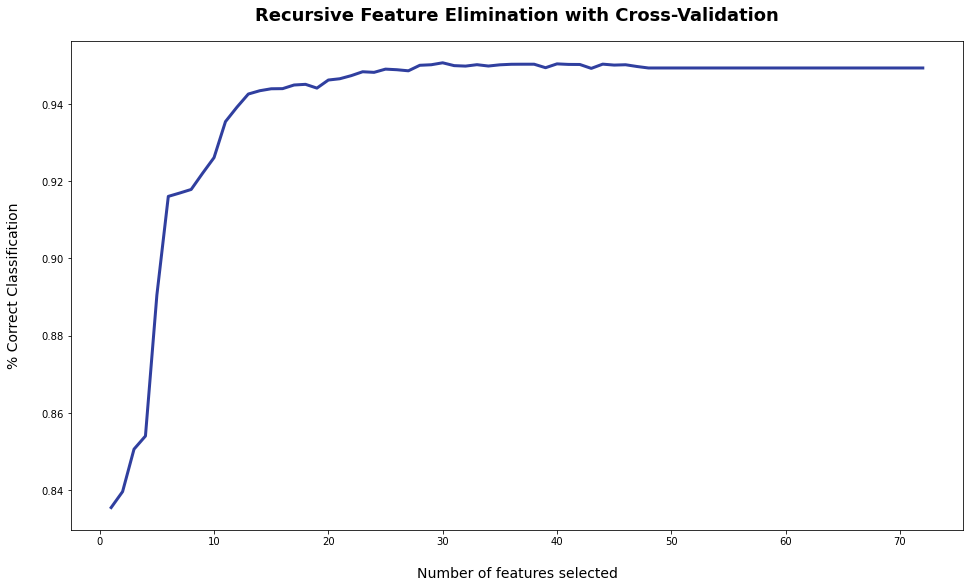

In [27]:
# Provided with a model that has feature coefficients (e.g. regression)or importance factors (e.g. trees), this algorithm starts from all features and greedily eliminates the least important feature. 
# Once all features are removed, the algorithm returns the subset which gives the best performance.
rfc = XGBClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True), scoring='accuracy',n_jobs=-1)
rfecv.fit(X,y)

print('Optimal number of features: {}'.format(rfecv.n_features_))


plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

- We can observe from the above plot as no of selected features increase our accuracy is saturating. After 30 selected features the accuracy is flattened.

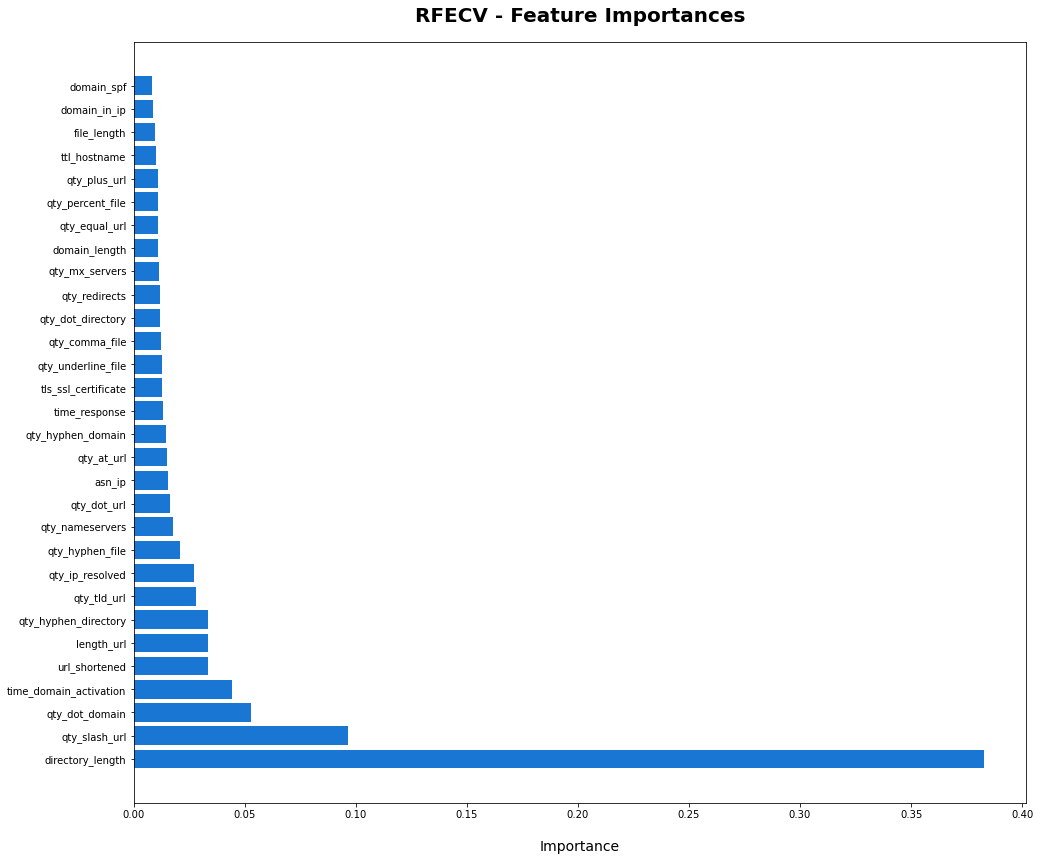

In [30]:
dset = pd.DataFrame()
dset['attr'] = X.columns[rfecv.support_]
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [31]:
# optimal no of features:42 is obtained from RFECV method
best_features=dset.head(30).attr.tolist()
print("Top features:",best_features)

Top features: ['directory_length', 'qty_slash_url', 'qty_dot_domain', 'time_domain_activation', 'url_shortened', 'length_url', 'qty_hyphen_directory', 'qty_tld_url', 'qty_ip_resolved', 'qty_hyphen_file', 'qty_nameservers', 'qty_dot_url', 'asn_ip', 'qty_at_url', 'qty_hyphen_domain', 'time_response', 'tls_ssl_certificate', 'qty_underline_file', 'qty_comma_file', 'qty_dot_directory', 'qty_redirects', 'qty_mx_servers', 'domain_length', 'qty_equal_url', 'qty_percent_file', 'qty_plus_url', 'ttl_hostname', 'file_length', 'domain_in_ip', 'domain_spf']


In [4]:
best_features=['directory_length', 'qty_slash_url', 'qty_dot_domain', 'time_domain_activation', 'url_shortened', 'length_url', 'qty_hyphen_directory', 'qty_tld_url', 'qty_ip_resolved', 'qty_hyphen_file', 'qty_nameservers', 'qty_dot_url', 'asn_ip', 'qty_at_url', 'qty_hyphen_domain', 'time_response', 'tls_ssl_certificate', 'qty_underline_file', 'qty_comma_file', 'qty_dot_directory', 'qty_redirects', 'qty_mx_servers', 'domain_length', 'qty_equal_url', 'qty_percent_file', 'qty_plus_url', 'ttl_hostname', 'file_length', 'domain_in_ip', 'domain_spf']

In [33]:
#finding no of outliers for the selected best features from RFECV
def Outliers(numerical_cols,drop=False):
    for each_feature in numerical_cols:
        feature_data=df_knn[each_feature]
        Q1= np.percentile(feature_data,.25)
        Q3= np.percentile(feature_data,.75)
        IQR =Q3-Q1 #Interquartile Range
        outlier_step=IQR * 1.5
        outliers=feature_data[~((feature_data >= Q1-outlier_step)&(feature_data<=Q3+outlier_step))].index.tolist()
        print('For the feature {}, No of outliers is {}'.format(each_feature,len(outliers)))
Outliers(best_features)

For the feature directory_length, No of outliers is 32833
For the feature qty_slash_url, No of outliers is 40886
For the feature qty_dot_domain, No of outliers is 37409
For the feature time_domain_activation, No of outliers is 56633
For the feature url_shortened, No of outliers is 486
For the feature length_url, No of outliers is 53633
For the feature qty_hyphen_directory, No of outliers is 7399
For the feature qty_tld_url, No of outliers is 411
For the feature qty_ip_resolved, No of outliers is 9374
For the feature qty_hyphen_file, No of outliers is 1754
For the feature qty_nameservers, No of outliers is 22158
For the feature qty_dot_url, No of outliers is 44763
For the feature asn_ip, No of outliers is 55298
For the feature qty_at_url, No of outliers is 1700
For the feature qty_hyphen_domain, No of outliers is 6002
For the feature time_response, No of outliers is 56919
For the feature tls_ssl_certificate, No of outliers is 29398
For the feature qty_underline_file, No of outliers is 1

In [12]:
def print_metrics(model,y_pred):
    list = []
    print("Training accuracy:",accuracy_score(y_train,model.predict(X_train)))
    print("Test accuracy:",accuracy_score(y_test, y_pred))
    print("Precision score:",precision_score(y_test, y_pred))
    print("Recall:",recall_score(y_test, y_pred))
    print("F1 score:",f1_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
    plt.show()

In [7]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [10]:
#data normalization using StandardScalar
# standardization can be done only on numerical cols. Applying it on categorical columns gives us undesirable outputs.
ss = StandardScaler()
X_train[numerical_cols] = ss.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = ss.transform(X_test[numerical_cols])
X_train=X_train[best_features]
X_test=X_test[best_features] 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43053, 30)
(14352, 30)
(43053,)
(14352,)


In [37]:
# Logistic Regression hyper-parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid_params={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1:lasso; l2:ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid_params,cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True),verbose = 2)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01

Training accuracy: 0.8873481522774255
Test accuracy: 0.8842670011148273
Precision score: 0.8947577442414615
Recall: 0.8864262295081967
F1 score: 0.8905725014823112
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88      6727
         1.0       0.89      0.89      0.89      7625

    accuracy                           0.88     14352
   macro avg       0.88      0.88      0.88     14352
weighted avg       0.88      0.88      0.88     14352



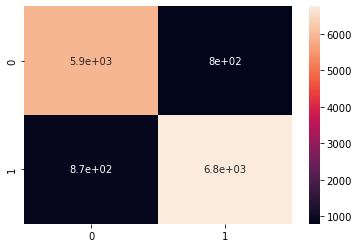

In [38]:
# performance metrics for logistic regression with l2 penality
y_pred=logreg_cv.predict(X_test)
print_metrics(logreg_cv,y_pred)

In [ ]:
#XGBoost hyper-parameter tuning
param_grid = {'learning_rate': [0.01, 0.1],'max_depth': list(range(10, 50,10)),'min_child_weight': [1, 3, 5],
                'subsample': [0.5, 0.7],'colsample_bytree': [0.5, 0.7],'n_estimators' : [100, 200, 500],
              'objective': ['reg:squarederror']}

xgb_cv = GridSearchCV(estimator = XGBClassifier(random_state=101),
                           param_grid = param_grid,                        
                           #scoring = 'neg_mean_absolute_error', 
                           scoring = 'neg_mean_squared_error', 
                           cv = StratifiedKFold(n_splits=3, random_state=101, shuffle=True),
                           n_jobs = -1,
                           verbose = 2)

xgb_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",xgb_cv.best_params_)
print("accuracy :",xgb_cv.best_score_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[03:17:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy: 0.9725919215850231
Test accuracy: 0.9482302118171684
Precision score: 0.9528823374572256
Recall: 0.9495081967213115
F1 score: 0.9511922748472706
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94      6727
         1.0       0.95      0.95      0.95      7625

    accuracy                           0.95     14352
   macro avg       0.95      0.95      0.95     14352
weighted avg       0.95      0.95      0.95     14352



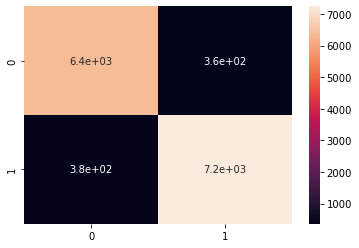

In [14]:
xgb=XGBClassifier(random_state=101).fit(X_train, y_train)
y_pred=xgb.predict(X_test)
print_metrics(xgb,y_pred)

In [15]:
#RandomForestClassifier hyper-parameter tuning
forest_params = {'max_depth': list(range(10, 50,10)), 'max_features': list(range(10,34,4)),'n_estimators': [ 200, 500,700]}

rfc_cv = GridSearchCV(RandomForestClassifier(random_state=101), forest_params, cv = StratifiedKFold(n_splits=3, random_state=101, shuffle=True),
                      scoring='accuracy', n_jobs = -1, verbose = 2)

rfc_cv.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=101, shuffle=True),
             estimator=RandomForestClassifier(random_state=101), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': [10, 14, 18, 22, 26, 30],
                         'n_estimators': [200, 500, 700]},
             scoring='accuracy', verbose=2)

In [16]:
print("tuned hpyerparameters :(best parameters) ",rfc_cv.best_params_)
print("accuracy :",rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 40, 'max_features': 10, 'n_estimators': 500}
accuracy : 0.9473904257543029


Training accuracy: 0.9999767728149026
Test accuracy: 0.9505992196209587
Precision score: 0.9514360313315927
Recall: 0.9558032786885245
F1 score: 0.9536146548904154
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      6727
         1.0       0.95      0.96      0.95      7625

    accuracy                           0.95     14352
   macro avg       0.95      0.95      0.95     14352
weighted avg       0.95      0.95      0.95     14352



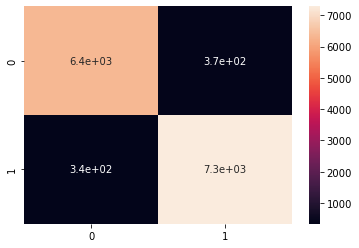

In [17]:
y_pred=rfc_cv.predict(X_test)
print_metrics(rfc_cv,y_pred)

# Conclusion:
- From the above analysis, the best accuracy  for KNN imputed data using RandomForestClassifier with an accuracy of 95%.
- The best accuracy  for Mean imputed data using KNNClassifier with an accuracy of 95%.
- We can also observe from the both knn imputated data analysis & mean imputed analysis that the most important features belong to attributes based on URL and external services.

<h2> Method_2 </h2> 
<h3> This notebook is presented by Pratibha Awasthi (015215655). Our data set consists of features like quantity, length of URL, parameters, and more, mainly numerical or categorical. During the analysis, it was observed that the considerable data set consists of '-1' as a value which the data authors have not described. 
This approach believes eventhough significance of '-1' is not described but it does hold some meaning. Also removal of such big data may distort the actual accuracy. Hence it consists -1" </h3>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('dataset_full.csv')

In [3]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [4]:
list(df.columns)

['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_slash_url',
 'qty_questionmark_url',
 'qty_equal_url',
 'qty_at_url',
 'qty_and_url',
 'qty_exclamation_url',
 'qty_space_url',
 'qty_tilde_url',
 'qty_comma_url',
 'qty_plus_url',
 'qty_asterisk_url',
 'qty_hashtag_url',
 'qty_dollar_url',
 'qty_percent_url',
 'qty_tld_url',
 'length_url',
 'qty_dot_domain',
 'qty_hyphen_domain',
 'qty_underline_domain',
 'qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_at_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain',
 'qty_vowels_domain',
 'domain_length',
 'domain_in_ip',
 'server_client_domain',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_dir

In [5]:
df['qty_dot_url'].value_counts()

2     53649
1     15885
3     13205
4      3593
5      1008
6       454
7       217
14      135
8       120
15       86
9        64
10       48
16       44
13       37
12       33
11       32
17       22
18        6
20        3
22        3
19        1
23        1
24        1
Name: qty_dot_url, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


<H3> The data below is checked for NA values. If found these values would be eliminated. However, it is found that there have been no such null values. <h3/>

In [7]:
df.isna().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

<h3> The unique value in data is checked and printed below. <h3/> 

In [8]:
for col in df.columns:
    unique_value_list = df[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {df[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

qty_dot_url has 23 unique values
qty_hyphen_url has 30 unique values
qty_underline_url has 22 unique values
qty_slash_url has 25 unique values
qty_questionmark_url contains:			[0 1 2 3 9 7]
qty_equal_url has 20 unique values
qty_at_url has 15 unique values
qty_and_url has 21 unique values
qty_exclamation_url contains:			[ 0  1  8  2  5  3  4  9  6 10]
qty_space_url contains:			[0 1 4 9 3 2 7 6]
qty_tilde_url contains:			[0 1 5 3 4 2]
qty_comma_url contains:			[ 0  1  4  3  2  5 11  7]
qty_plus_url contains:			[ 0  2  1  5  4  3  6  9 19  7]
qty_asterisk_url has 18 unique values
qty_hashtag_url contains:			[ 0  2  9  3  1 13  7]
qty_dollar_url contains:			[ 0  1  6  3  9  8  2 10  5  4]
qty_percent_url has 52 unique values
qty_tld_url contains:			[ 1  3  2  0  4  5 12  7  9]
length_url has 453 unique values
qty_dot_domain has 19 unique values
qty_hyphen_domain has 12 unique values
qty_underline_domain contains:			[0 1 2 3]
qty_slash_domain contains:			[0]
qty_questionmark_domain contain

<h2>Exploratory Data Analysis</h2>

<h3> The data is analyzed to find the value counts for '0' and '1' A webiste is considered legitimate (value 0) or phishing (value 1). It was found that there are 58000 for 0s and 30647 for 1s. </h3>

In [10]:
df['phishing'].value_counts()

0    58000
1    30647
Name: phishing, dtype: int64

<h3> Using countplot the 0s and 1s are plotted for better visuals </h3>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='phishing', ylabel='count'>

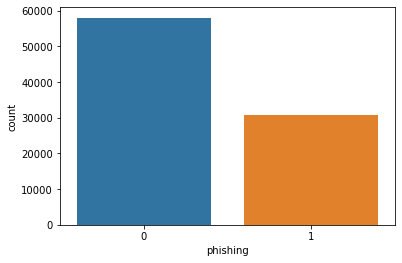

In [11]:
sns.countplot(df['phishing'])

<h3> Correlation: A heat map (or heatmap) is a graphical representation of data with color-coded values. Heat maps make it simple to display and comprehend complicated data at a glance. We have plotted heatmap to find correlation between different features. <h3/>

<AxesSubplot:>

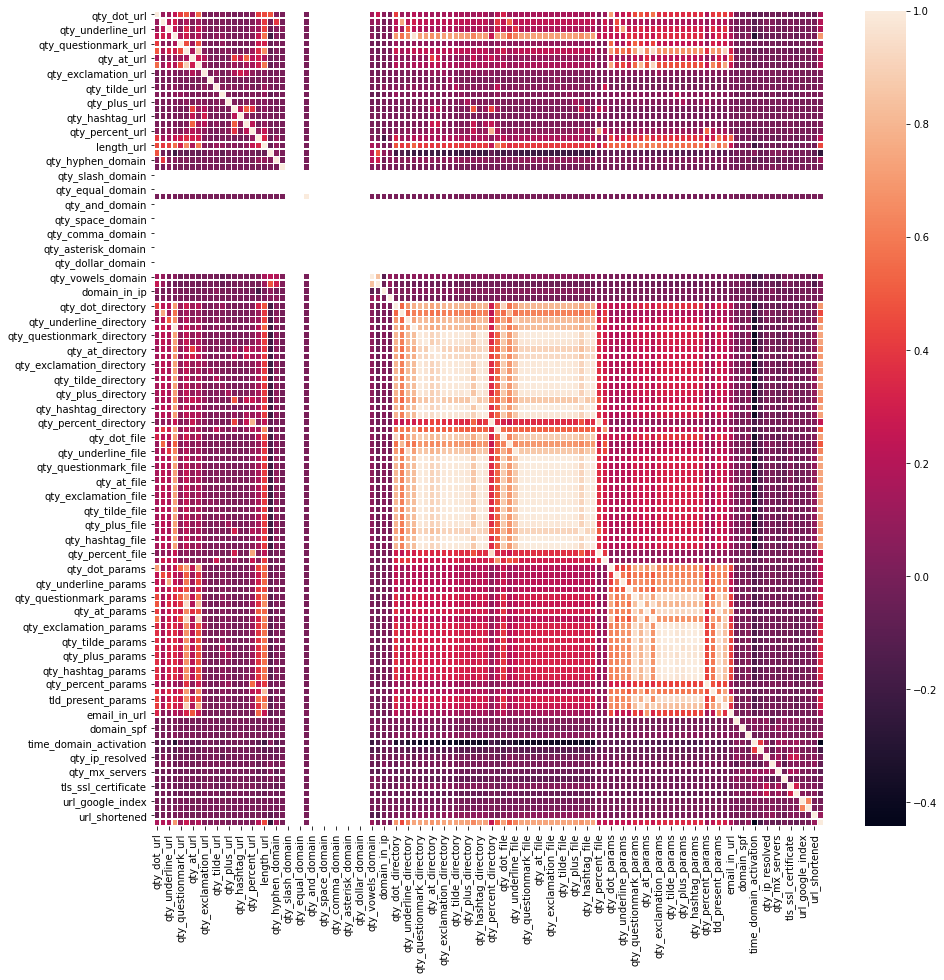

In [12]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), linewidths=.5)

<h3> This correlation is printed below <h3/>


In [13]:
correlation= df.corr()
correlation

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
qty_dot_url,1.000000,0.109737,0.127851,0.246201,0.409549,0.498531,0.169224,0.550918,0.004187,-0.000405,...,-0.054120,-0.014089,-0.049845,0.012300,-0.065105,-0.051842,-0.004035,-0.002490,-0.059222,0.171128
qty_hyphen_url,0.109737,1.000000,0.213589,0.304762,0.061247,0.175158,0.041982,0.127984,0.018253,0.018090,...,0.029222,0.032991,-0.027048,-0.031027,0.009113,-0.001930,-0.002939,0.006875,-0.010346,0.200382
qty_underline_url,0.127851,0.213589,1.000000,0.246653,0.067009,0.334635,0.056885,0.256192,0.062300,-0.000767,...,0.004625,0.023962,-0.007595,-0.027089,0.012809,-0.013864,-0.001823,0.003421,-0.012158,0.191151
qty_slash_url,0.246201,0.304762,0.246653,1.000000,0.182759,0.287043,0.102281,0.202511,0.025946,0.015055,...,-0.046034,-0.032416,-0.045904,-0.021936,-0.018282,-0.047873,-0.005406,0.009470,-0.001125,0.699061
qty_questionmark_url,0.409549,0.061247,0.067009,0.182759,1.000000,0.461202,0.126747,0.467278,0.017859,0.004359,...,-0.025966,-0.003923,-0.032176,-0.006653,-0.040856,-0.024214,0.011679,0.010029,0.012847,0.111694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
qty_redirects,-0.051842,-0.001930,-0.013864,-0.047873,-0.024214,-0.043475,-0.017895,-0.030949,0.004488,-0.006923,...,0.274887,0.051420,0.133489,0.007329,0.306561,1.000000,0.038041,0.033091,0.049475,-0.061775
url_google_index,-0.004035,-0.002939,-0.001823,-0.005406,0.011679,-0.000349,-0.001903,-0.000335,-0.000811,-0.000336,...,0.043826,0.042233,0.022227,0.007591,0.026047,0.038041,1.000000,0.628815,-0.001785,-0.008986
domain_google_index,-0.002490,0.006875,0.003421,0.009470,0.010029,0.004701,-0.001889,0.001886,-0.001076,-0.000446,...,0.039959,0.040542,0.023628,0.008920,0.027592,0.033091,0.628815,1.000000,0.000045,0.000794
url_shortened,-0.059222,-0.010346,-0.012158,-0.001125,0.012847,-0.011855,-0.005330,-0.009989,-0.002503,-0.001038,...,0.059500,0.084482,0.013533,-0.031268,0.037850,0.049475,-0.001785,0.000045,1.000000,0.099250


In [14]:
print(correlation['qty_dot_url'])

qty_dot_url             1.000000
qty_hyphen_url          0.109737
qty_underline_url       0.127851
qty_slash_url           0.246201
qty_questionmark_url    0.409549
                          ...   
qty_redirects          -0.051842
url_google_index       -0.004035
domain_google_index    -0.002490
url_shortened          -0.059222
phishing                0.171128
Name: qty_dot_url, Length: 112, dtype: float64


<h3> Outliers: A data item/object that deviates greatly from the rest of the objects is referred to be an outlier. Errors in measurement or execution might cause them. In the give jupyter the The outliers are detected using the z score. In this methodology, the threshold is kept to 3. 
Using IQR, the outliers are removed, and a new dataset is generated <h3/>

In [15]:
#Finding Outliers using z-score:

from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

[[0.65444938 0.29376903 0.17313003 ... 0.03192479 0.07424717 1.3756882 ]
 [2.27305787 0.29376903 1.34717284 ... 0.03192479 0.07424717 1.3756882 ]
 [0.15485486 0.29376903 0.17313003 ... 0.03192479 0.07424717 0.7269089 ]
 ...
 [0.15485486 0.59966254 0.17313003 ... 0.03192479 0.07424717 1.3756882 ]
 [0.15485486 0.29376903 0.17313003 ... 0.03192479 0.07424717 1.3756882 ]
 [0.15485486 0.29376903 0.17313003 ... 0.03192479 0.07424717 0.7269089 ]]


In [16]:
threshold = 3
print(np.where(z > 3))

(array([    1,     1,     1, ..., 88642, 88643, 88644]), array([17, 18, 40, ..., 17, 36, 99]))


In [17]:
#IQR Score:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

qty_dot_url             0.0
qty_hyphen_url          0.0
qty_underline_url       0.0
qty_slash_url           2.0
qty_questionmark_url    0.0
                       ... 
qty_redirects           1.0
url_google_index        0.0
domain_google_index     0.0
url_shortened           0.0
phishing                1.0
Length: 112, dtype: float64


<h3> True means presence of an outlier: </h3>

In [1]:
#print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

In [19]:
#Removing outliers:

New_df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
New_df.shape #new dataset without outliers

(13438, 112)

In [20]:
df.shape #old dataset with outliers

(88647, 112)

<h2> Modeling </h2>
<h3> The accuracy is retrieved using three different models. </h3>

In [22]:
conda install -c anaconda py-xgboost

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.model_selection import train_test_split

y = New_df['phishing']
x = New_df.drop(columns=['phishing'])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=0)

In [24]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

<h3> (1) Decision Tree Classifier </h3>

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
classifier = DecisionTreeClassifier(random_state =0)
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)
accuracy_score(y_test,y_predict)

0.9565476190476191

<h3> (2) Random Forest Classifier </h3>

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test , y_pred)

0.975297619047619

<h3> (3) KNN Classifier </h3>

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
classifier = KNeighborsClassifier()
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)
accuracy_score(y_test , y_predict)

0.9729166666666667

<h3> Applying K-fold </h3>

In [31]:
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


def binary_classification_accuracy(actual, pred):
    
    print(f'Confusion matrix: \n{confusion_matrix(actual, pred)}')
    print(f'Accuracy score: \n{accuracy_score(actual, pred)}')
    print(f'Classification report: \n{classification_report(actual, pred)}')

In [33]:
folds = KFold(n_splits=4, shuffle=True, random_state=42)

train_index_list = list()
validation_index_list = list()

for fold, (train_idx, validation_idx) in enumerate(folds.split(x, y)):
    
    model = XGBClassifier()
    model.fit(np.array(x)[train_idx,:], np.array(y)[train_idx])
    predicted_values = model.predict(np.array(x)[validation_idx,:])
    print(f'==== FOLD {fold+1} ====')
    binary_classification_accuracy(np.array(y)[validation_idx], predicted_values)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:53:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
==== FOLD 1 ====
Confusion matrix: 
[[3077   24]
 [  46  213]]
Accuracy score: 
0.9791666666666666
Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3101
           1       0.90      0.82      0.86       259

    accuracy                           0.98      3360
   macro avg       0.94      0.91      0.92      3360
weighted avg       0.98      0.98      0.98      3360



/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:53:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
==== FOLD 2 ====
Confusion matrix: 
[[3103   19]
 [  45  193]]
Accuracy score: 
0.9809523809523809
Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3122
           1       0.91      0.81      0.86       238

    accuracy                           0.98      3360
   macro avg       0.95      0.90      0.92      3360
weighted avg       0.98      0.98      0.98      3360

[03:53:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the defau

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


==== FOLD 3 ====
Confusion matrix: 
[[3095   24]
 [  48  192]]
Accuracy score: 
0.9785650491217625
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3119
           1       0.89      0.80      0.84       240

    accuracy                           0.98      3359
   macro avg       0.94      0.90      0.92      3359
weighted avg       0.98      0.98      0.98      3359

[03:53:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


==== FOLD 4 ====
Confusion matrix: 
[[3094   26]
 [  41  198]]
Accuracy score: 
0.9800535873771956
Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3120
           1       0.88      0.83      0.86       239

    accuracy                           0.98      3359
   macro avg       0.94      0.91      0.92      3359
weighted avg       0.98      0.98      0.98      3359



<h2> Conclusion for Method - ii:  <h2/>
    <ol>
  <li>The accuracy found through decision tree is 95.65%</li>
  <li>The accuracy found through Random Forest is 97.52%</li>
  <li>The accuracy found through KNN is 97.29% </li>
  <li>The best accuracy has been found through Random Forest.</li>
</ol>